In [1]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
fine_df_file = '../data/interim/fine_enriched_parking_violations.tsv'

In [3]:
df = pd.read_csv(fine_df_file, sep='\t', parse_dates=['ticket_issue_datetime'])
df['counter'] = 1

# MD Top 15 violations by total revenue (revenue and total)

In [4]:
dc_df = df[(df.rp_plate_state.isin(['MD']))]

dc_fines = dc_df.groupby(['violation_code']).fine.sum().reset_index('violation_code')
fine_codes_15 = dc_fines.sort_values(by='fine', ascending=False)[:15]
top_codes = dc_df[dc_df.violation_code.isin(fine_codes_15.violation_code)]

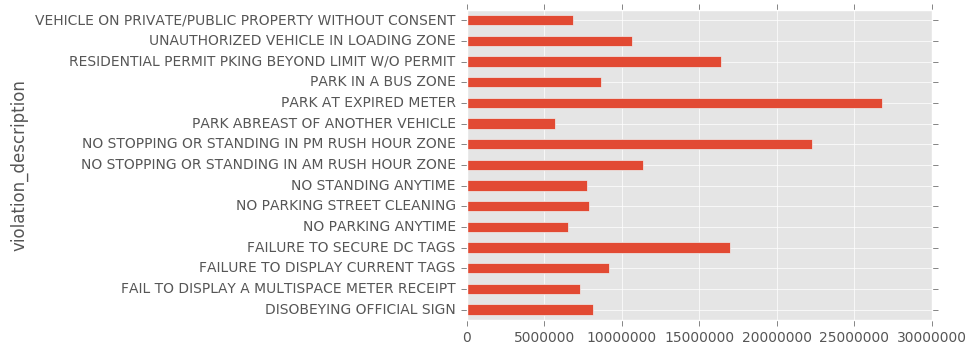

In [5]:
top_violation_by_state = top_codes.groupby(['violation_description']).fine.sum()
ax = top_violation_by_state.plot.barh()
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

plt.draw()

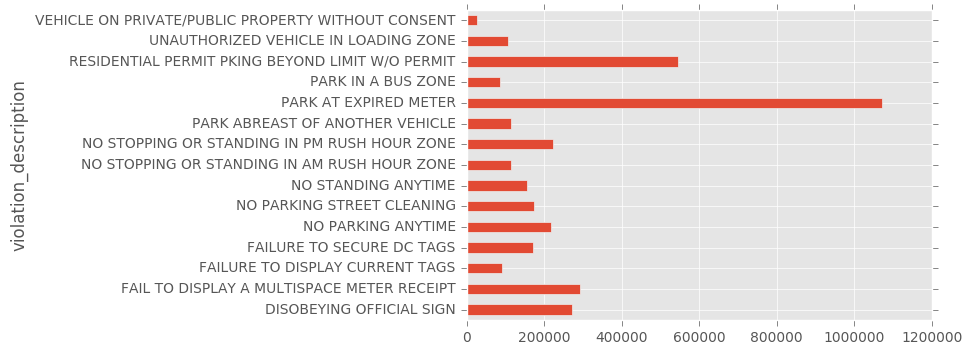

In [6]:
top_violation_by_state = top_codes.groupby(['violation_description']).counter.sum()
ax = top_violation_by_state.plot.barh()
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

plt.draw()

### Areas to explore
Failure to secure dc tags --- huge revenue maker

Residential Parking beyond permit period

Park at Expired Meter

# MD Top 15 violations by total tickets (revenue and total)

In [7]:
dc_df = df[(df.rp_plate_state.isin(['MD']))]

dc_fines = dc_df.groupby(['violation_code']).counter.sum().reset_index('violation_code')
fine_codes_15 = dc_fines.sort_values(by='counter', ascending=False)[:15]
top_codes = dc_df[dc_df.violation_code.isin(fine_codes_15.violation_code)]

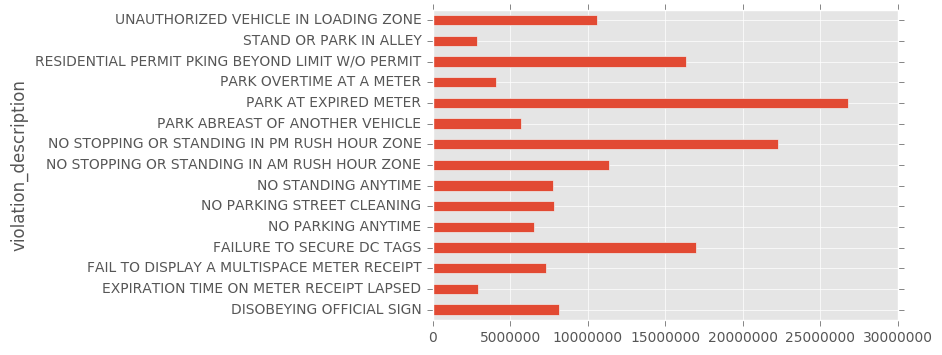

In [8]:
top_violation_by_state = top_codes.groupby(['violation_description']).fine.sum()
ax = top_violation_by_state.plot.barh()
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

plt.draw()

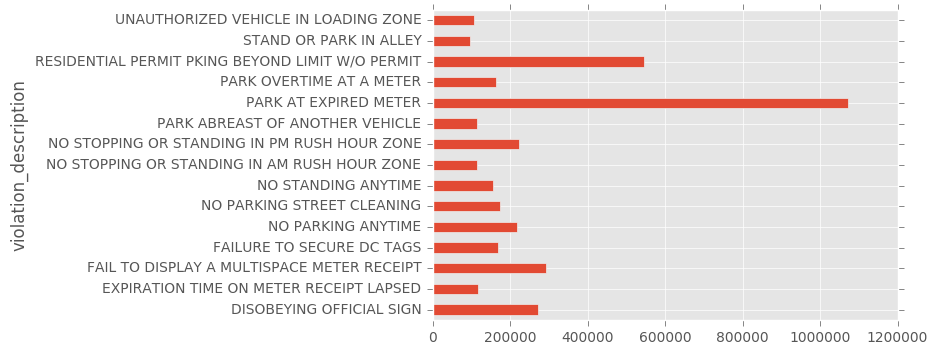

In [9]:
top_violation_by_state = top_codes.groupby(['violation_description']).counter.sum()
ax = top_violation_by_state.plot.barh()
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

plt.draw()